# Jan Zubalewicz & Mateusz Kubita

# Task
Perform exploratory data analysis, preprocess the data for machine learning, and then build and evaluate Random Forest Regressor, Decision Tree Regressor, and Linear Regression models to predict the 'Performance Score'.

In [49]:
import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("ziya07/athlete-injury-and-performance-dataset")

# print("Path to dataset files:", path)

In [50]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\Mateusz\.cache\kagglehub\datasets\ziya07\athlete-injury-and-performance-dataset\versions\1\collegiate_athlete_injury_dataset.csv")

df.head()

,Athlete_ID,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
0,A001,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
1,A002,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0
2,A003,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0
3,A004,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0
4,A005,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,49,0


This dataset is designed to analyze the impact of complex scheduling algorithms on injury rates and athletic performance in a collegiate sports environment. It provides synthetic but realistic data for athletes, capturing their demographics, training regimes, schedules, fatigue levels, and injury risks.

Features Overview

Athlete Information
 - Athlete_ID: Unique identifier for each athlete (e.g., A001, A002).
 - Age: Athlete's age (18–25 years).
 - Gender: Gender of the athlete (Male/Female).
 - Height_cm: Height of the athlete in centimeters (160–200 cm).
 - Weight_kg: Weight of the athlete in kilograms (55–100 kg).
 - Position: Playing position in the team (Guard, Forward, Center).
Training Information
 - Training_Intensity: Average intensity of training sessions on a scale of 1 (low) to 10 (high).
 - Training_Hours_Per_Week: Total hours of training per week (5–20 hours).
 - Recovery_Days_Per_Week: Number of days dedicated to recovery per week (1–3 days).
Schedule Information
 - Match_Count_Per_Week: Number of matches scheduled per week (1–4 matches).
 - Rest_Between_Events_Days: Average rest days between matches (1–3 days).
Derived Features
 - Load_Balance_Score: A calculated score (0–100) indicating the balance between training load and recovery. A higher score reflects a better balance.
 - ACL_Risk_Score: Predicted risk score (0–100) for ACL injuries. A higher score indicates a greater risk of injury.
Injury Information
 - Injury_Indicator: Target column indicating whether the athlete sustained an ACL injury (1 = Yes, 0 = No).
Performance Metrics
 - Fatigue_Score: Subjective fatigue level on a scale of 1 (low) to 10 (high).
 - Performance_Score: Composite performance score (50–100) based on metrics like points scored and assists.
 - Team_Contribution_Score: Athlete’s overall contribution to the team’s success on a scale of 50–100.

In [51]:
df = df.drop(['Athlete_ID'], axis=1)

## Explain Columns

### Subtask:
Provide a detailed explanation for each column in the DataFrame, describing its likely meaning and context in athlete performance data.


### Column Explanations:

*   `athlete_id`: A unique identifier for each athlete. This column is an integer and serves to distinguish individual athletes within the dataset.

*   `age`: The age of the athlete in years. This is an integer, typically ranging from 18 to 35, representing the athlete's current age. Age can influence training capacity, recovery, and peak performance.

...

## Perform Basic EDA


In [55]:
print("### Basic Descriptive Statistics:\n")
print(df.describe())

print("\n### Missing Values per Column:\n")
print(df.isnull().sum())

print("\n### DataFrame Info (Data Types and Non-Null Counts):\n")
df.info()

### Basic Descriptive Statistics:

              Age   Height_cm   Weight_kg  Training_Intensity  \
count  200.000000  200.000000  200.000000           200.00000   
mean    21.170000  180.805000   77.475000             5.10500   
std      2.002787   11.529598   12.440789             2.49904   
min     18.000000  160.000000   55.000000             1.00000   
25%     19.000000  171.000000   67.000000             3.00000   
50%     21.000000  182.500000   77.500000             5.00000   
75%     23.000000  191.000000   89.000000             7.00000   
max     24.000000  199.000000   99.000000             9.00000   

       Training_Hours_Per_Week  Recovery_Days_Per_Week  Match_Count_Per_Week  \
count               200.000000              200.000000            200.000000   
mean                 11.315000                1.985000              2.385000   
std                   4.438952                0.811212              1.154748   
min                   5.000000                1.000000     

In [56]:
df.head()

,Age,Gender,Height_cm,Weight_kg,Position,Training_Intensity,Training_Hours_Per_Week,Recovery_Days_Per_Week,Match_Count_Per_Week,Rest_Between_Events_Days,Fatigue_Score,Performance_Score,Team_Contribution_Score,Load_Balance_Score,ACL_Risk_Score,Injury_Indicator
0,24,Female,195,99,Center,2,13,2,3,1,1,99,58,100,4,0
1,21,Male,192,65,Forward,8,14,1,3,1,4,55,63,83,73,0
2,22,Male,163,83,Guard,8,8,2,1,3,6,58,62,100,62,0
3,24,Female,192,90,Guard,1,13,1,1,1,7,82,74,78,51,0
4,20,Female,173,79,Center,3,9,1,2,1,2,90,51,83,49,0


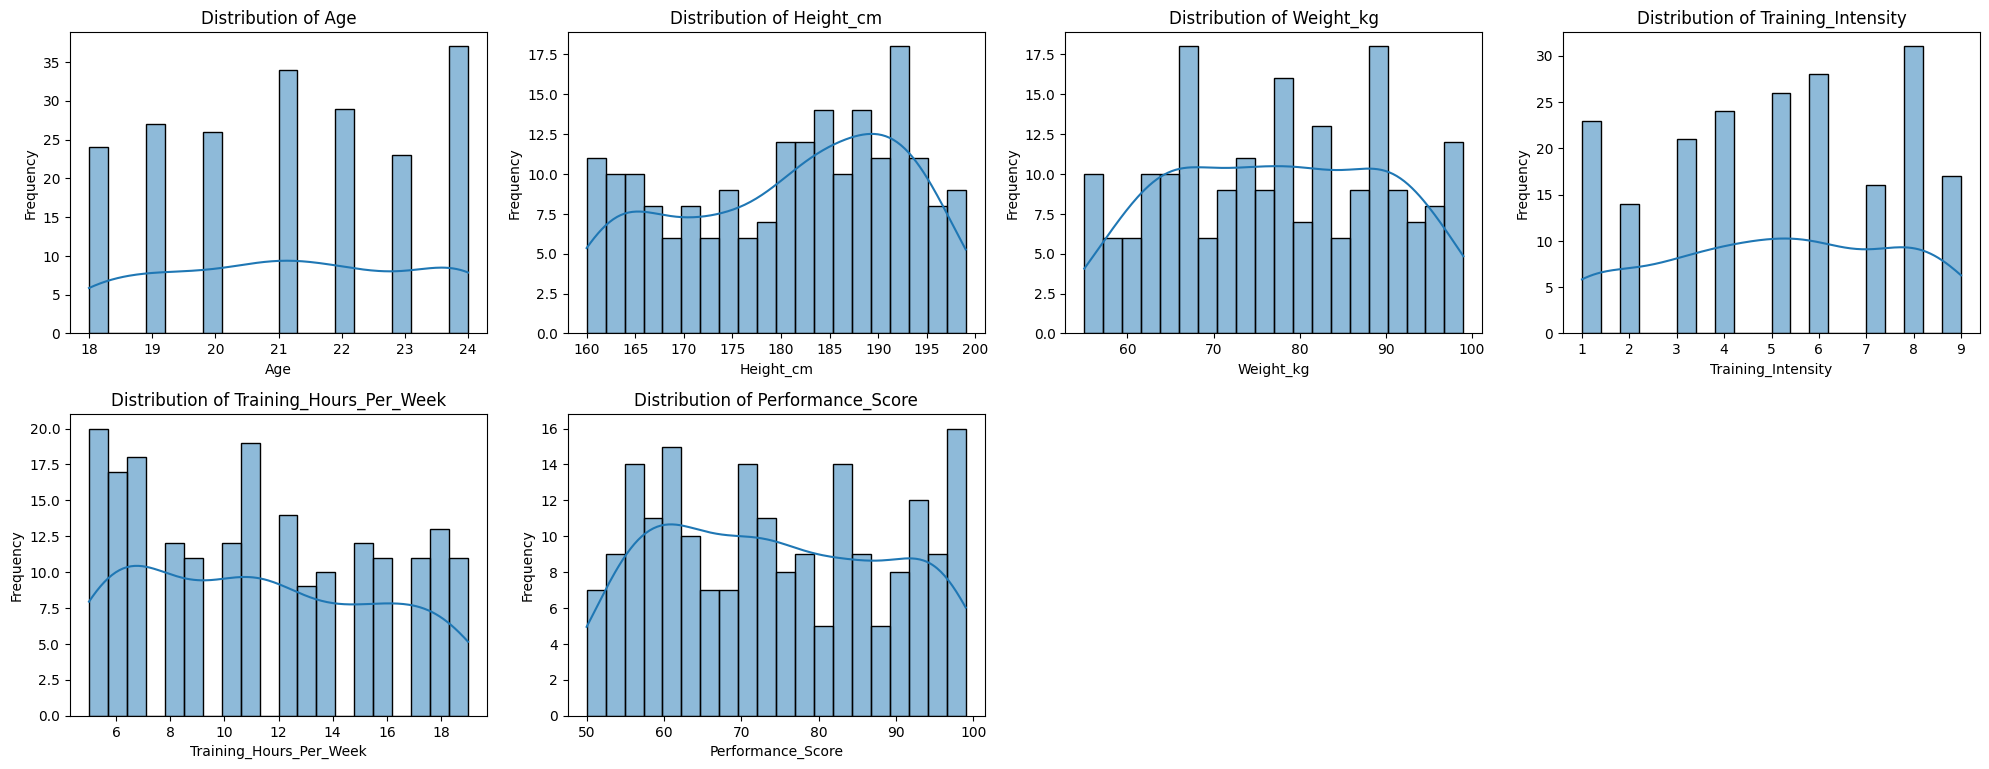

C:\Users\Mateusz\AppData\Local\Temp\ipykernel_2352\1752966276.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Height_cm', y='Performance_Score', palette='deep')
C:\Users\Mateusz\AppData\Local\Temp\ipykernel_2352\1752966276.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Weight_kg', y='Performance_Score', palette='deep')
C:\Users\Mateusz\AppData\Local\Temp\ipykernel_2352\1752966276.py:34: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Training_Hours_Per_Week', y='Performance_Score', palette='deep')


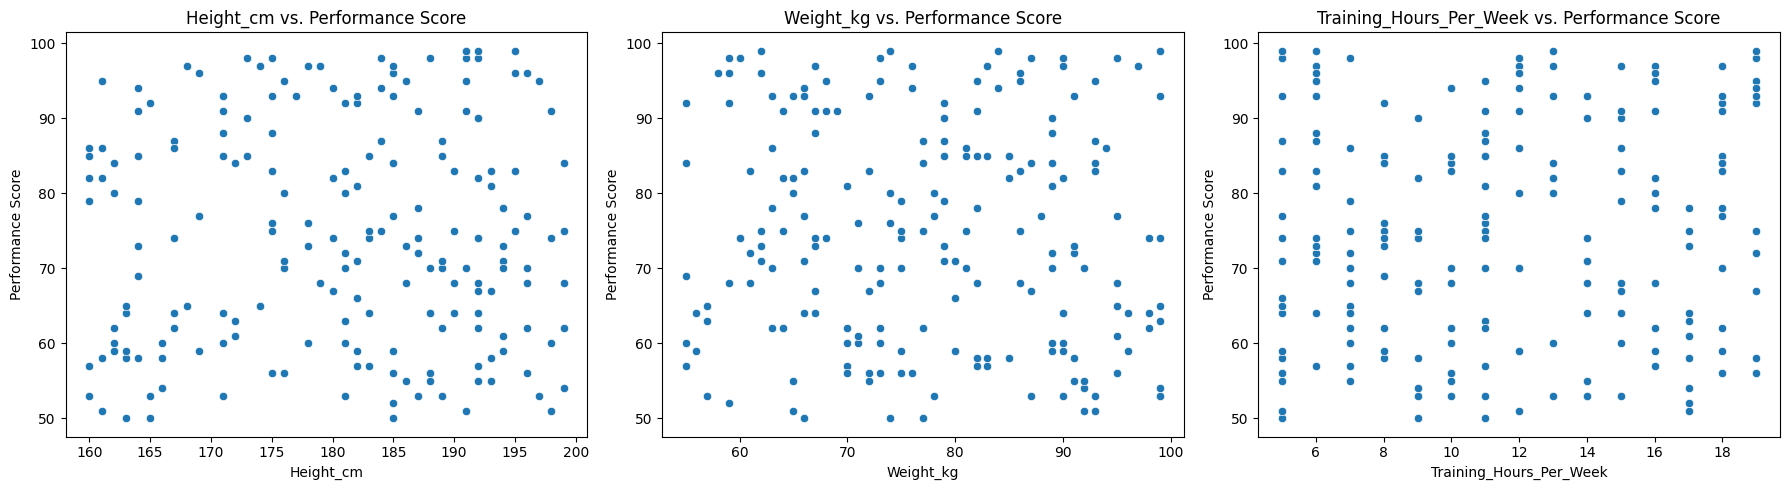

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Visualize the distribution of numerical features by creating histograms
numerical_cols = [ "Age", "Height_cm", "Weight_kg", "Training_Intensity", "Training_Hours_Per_Week", "Performance_Score"
]

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 6. Visualize the relationships between key numerical features and 'Performance Score'
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Height_cm', y='Performance_Score', palette='deep')
plt.title('Height_cm vs. Performance Score')
plt.xlabel('Height_cm')
plt.ylabel('Performance Score')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Weight_kg', y='Performance_Score', palette='deep')
plt.title('Weight_kg vs. Performance Score')
plt.xlabel('Weight_kg')
plt.ylabel('Performance Score')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='Training_Hours_Per_Week', y='Performance_Score', palette='deep')
plt.title('Training_Hours_Per_Week vs. Performance Score')
plt.xlabel('Training_Hours_Per_Week')
plt.ylabel('Performance Score')


plt.tight_layout()
plt.show()

**Reasoning**:
To complete the exploratory data analysis, I will now calculate the correlation matrix for all numerical columns in the DataFrame and then visualize it as a heatmap to understand the relationships between the different variables.



### Correlation Matrix:

                              Age  Height_cm  Weight_kg  Training_Intensity  \
Age                      1.000000  -0.015967  -0.022215            0.046616   
Height_cm               -0.015967   1.000000   0.029832           -0.060676   
Weight_kg               -0.022215   0.029832   1.000000           -0.040565   
Training_Intensity       0.046616  -0.060676  -0.040565            1.000000   
Training_Hours_Per_Week -0.082926   0.055896  -0.118833           -0.020210   
Performance_Score        0.007918   0.012898  -0.084063           -0.130479   

                         Training_Hours_Per_Week  Performance_Score  
Age                                    -0.082926           0.007918  
Height_cm                               0.055896           0.012898  
Weight_kg                              -0.118833          -0.084063  
Training_Intensity                     -0.020210          -0.130479  
Training_Hours_Per_Week                 1.000000           0.077861  
P

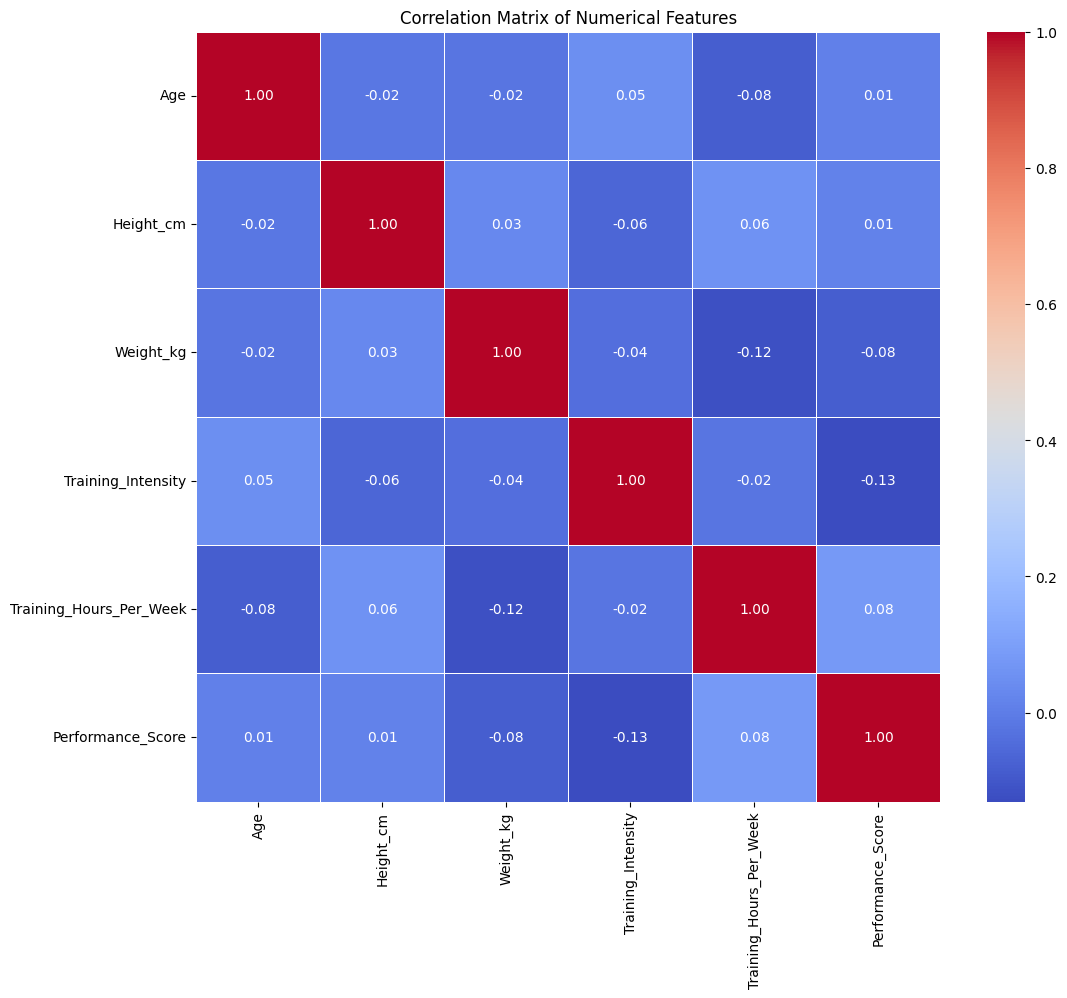

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# 8. Calculate the correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr()

print("### Correlation Matrix:\n")
print(correlation_matrix)

# 9. Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Prepare Data for ML


# Task

## Prepare Data for ML


In [61]:
from sklearn.model_selection import train_test_split

df['Gender'] = df['Gender'].map({'Female':1, 'Male': 0})

X = df.drop(columns=['Performance_Score'])

# 4. Define target variable (y) as 'Performance Score'
y = df['Performance_Score']

# 5. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing complete.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data preprocessing complete.
X_train shape: (160, 15)
X_test shape: (40, 15)
y_train shape: (160,)
y_test shape: (40,)


## Build and Evaluate Random Forest Model

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Instantiate a RandomForestRegressor model
# Using a random_state for reproducibility
rf_model = RandomForestRegressor(random_state=42)

print("Training Random Forest Regressor model...")
# 3. Train the model
rf_model.fit(X_train, y_train)
print("Random Forest Regressor model trained.")

# 4. Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# 5. Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# 6. Print the calculated metrics
print("\nRandom Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

Training Random Forest Regressor model...


ValueError: could not convert string to float: 'Guard'

## Build and Evaluate Decision Tree Model


In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Instantiate a DecisionTreeRegressor model
# Using a random_state for reproducibility
dt_model = DecisionTreeRegressor(random_state=42)

print("Training Decision Tree Regressor model...")
# 3. Train the model
dt_model.fit(X_train, y_train)
print("Decision Tree Regressor model trained.")

# 4. Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# 5. Calculate evaluation metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# 6. Print the calculated metrics
print("\nDecision Tree Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"R-squared (R2): {r2_dt:.2f}")

Training Decision Tree Regressor model...
Decision Tree Regressor model trained.

Decision Tree Regressor Performance:
Mean Absolute Error (MAE): 0.33
Mean Squared Error (MSE): 0.16
R-squared (R2): -0.87


## Build and Evaluate Linear Regression Model

